# facebook messages analysis
## Author: Oliver Gladfelter
### Date: June 2020

In [1]:
import pandas as pd
import os
import json
import matplotlib.pyplot as plt
from matplotlib import pyplot, dates
from datetime import datetime
import calendar
import numpy
import re
import numpy as np

dataDF = pd.read_csv("facebookMessages.csv")

# Group and count by message sender, year, month, day

In [2]:
# Count the number of messages sent by each unique sender, year, and month combination
me = dataDF[dataDF['sender_name']=='Oliver Gladfelter']
meByMonth = me.groupby(['year', 'month']).count().reset_index()
del meByMonth['timestamp_ms']
del meByMonth['day']
del meByMonth['sender_name']

# How Many Messages I've Sent Each Month Since March 2011

In [3]:
def toMonthAbbr(value):
    """
    Convert numerical month value to text abbreviation
    Ex: 12 --> 'Dec'
    """
    return calendar.month_abbr[int(value)]
    
def yearAbbr(value):
    """
    Convert full year format to abbreviation
    Ex: 2018 --> '18
    """
    return "'" + str(value)[-2:]

def plotOverTimeFrom():
    
    data = meByMonth.copy()
    data = data.reset_index()
    
    # For labeling purposes, create two new variables: abbreviated month text and year format
    data['monthName'] = data['month'].apply(toMonthAbbr)
    data['yearAbbr'] = data['year'].apply(yearAbbr)
    
    # Plotting and axis/tick labeling
    plt.figure(figsize=(30,10))
    #plt.plot(data['index'], data['content'], c='blue')
    plt.ylabel("Number of Messages I Sent")
    plt.xlabel("")
    plt.xticks(data['index'],data['monthName'])
    plt.xticks(rotation=90)
    
    # Year labeling and shading
    previousNum = 0
    for num in range(0, len(data) - 1):
        if data['year'][num] != data['year'][num+1]:
            if (int(data['year'][num]) % 2 == 0):
                plt.axvspan(previousNum, num + 1, color='gray', alpha=0.3, lw=0)
            if (int(data['year'][num]) % 2 != 0):
                plt.axvspan(previousNum, num + 1, color='gray', alpha=0.2, lw=0)
            plt.text(((previousNum + num) / 2), data['content'].max() + (data['content'].max() / 15), data['yearAbbr'][num], ha = 'center', fontsize = 15)
            previousNum = num+1
    
    # Year labeling and shading for last year
    if (int(data['year'][num]) % 2 == 0):
        plt.axvspan(previousNum, len(data) - 1, color='gray', alpha=0.3, lw=0)
    if (int(data['year'][num]) % 2 != 0):
        plt.axvspan(previousNum, len(data) - 1, color='gray', alpha=0.2, lw=0)
    plt.text(((previousNum + len(data)) / 2), data['content'].max() + (data['content'].max() / 15), data['yearAbbr'][previousNum], ha = 'center', fontsize = 15)
    
    plt.plot(data['index'], data['content'], c='blue')
    
    plt.axhline(y=0)
    plt.show()

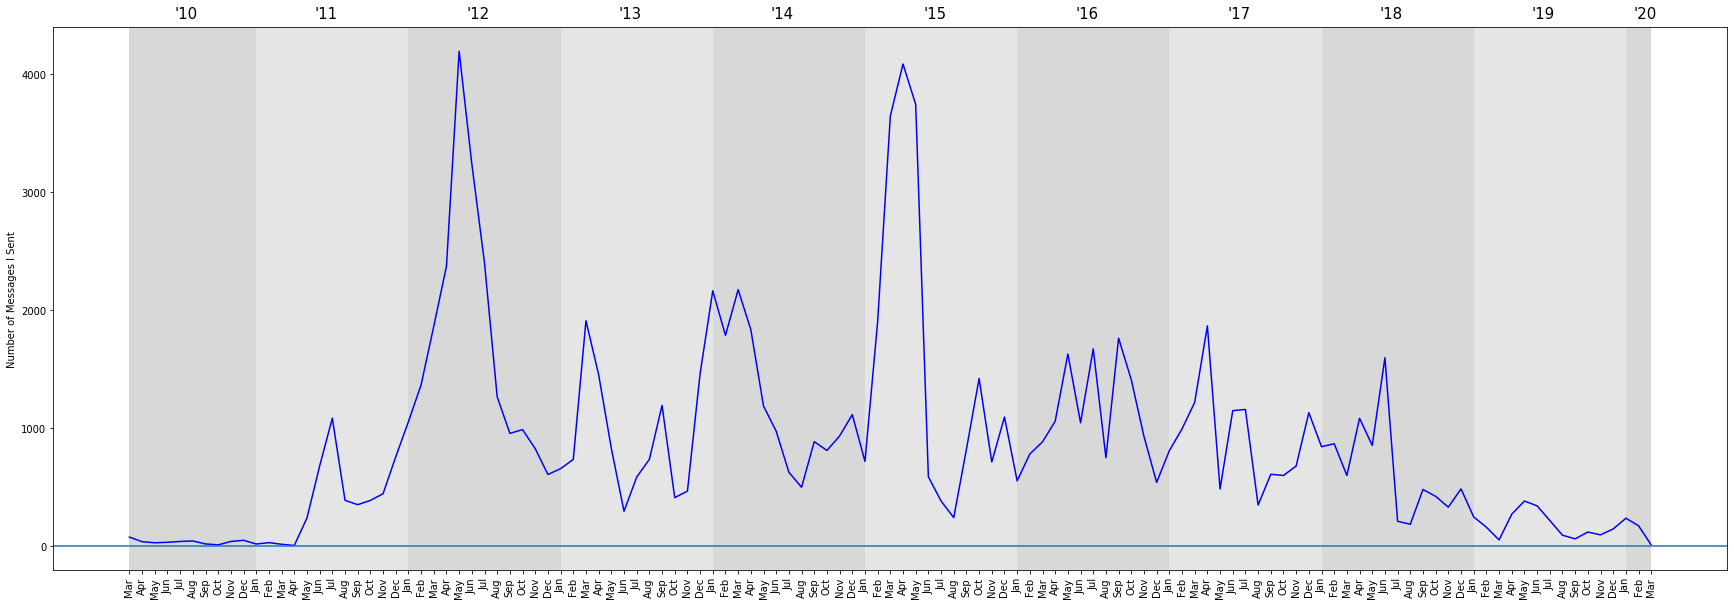

In [4]:
plotOverTimeFrom()

# What times do I send and receive messages?

In [4]:
def hour(time):
    return time.split(":")[0]

def minute(time):
    return time.split(":")[1]

dataDF['hour'] = dataDF['time'].apply(hour)
dataDF['minute'] = dataDF['time'].apply(minute)

dataDF['time'] = dataDF['hour'] + ":" + dataDF['minute']

del dataDF['hour']
del dataDF['minute']

highschool = dataDF[(dataDF['timestamp_ms']>=1280740788000) & (dataDF['timestamp_ms']<=1401593763112)]
college = dataDF[(dataDF['timestamp_ms']>=1408135324271) & (dataDF['timestamp_ms']<=1526789738597)]

groupedByTime = highschool.groupby('time').count().reset_index()
groupedByTime = groupedByTime[['time','content']]

minutes = []

for hour in range(0,24):
    if hour < 10:
        hour = "0" + str(hour)
    else:
        hour = str(hour)
    for minute in range(0,60):
        if minute < 10:
            minute = "0" + str(minute)
        else:
            minute = str(minute)
        minutes.append((hour) + ":" + (minute))
        
timeData = pd.merge(groupedByTime, pd.DataFrame(minutes), how='right', left_on='time', right_on=0)

timeData = timeData.fillna(0)

timeData  = timeData.sort_values('time')
del timeData[0]
timeData = timeData.reset_index()
del timeData['index']
timeData = timeData.reset_index()

timeData.to_csv("timeData_highschool.csv",index=False)

In [6]:
timeData.head()

,time,content
0,00:00,9.0
1,00:01,13.0
2,00:02,8.0
3,00:03,7.0
4,00:04,15.0
